In [21]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt # Visualization
import numpy as np

Text(0.5, 0, 'x')

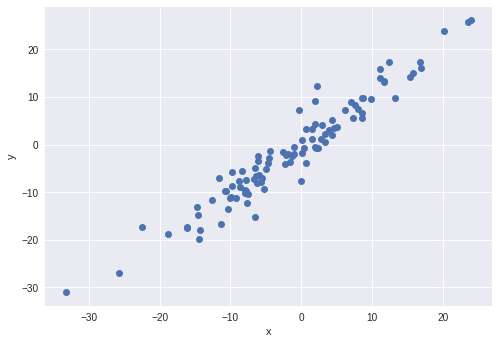

In [23]:
X = torch.randn(100, 1)*10 # Normal Distribution
y = X + 3 * torch.randn(100, 1) # relatively small deviation
# Bias -> becomes noisy
plt.plot(X.numpy(), y.numpy(), 'o') # o는 이거 모양, 점으로 ㄱㄱ
plt.ylabel('y') # label 제목
plt.xlabel('x') # label 제목

In [24]:
print(X)
print(y)

tensor([[ -6.5398],
        [-16.0948],
        [ -1.0017],
        [ -6.0919],
        [ -9.7977],
        [-16.0910],
        [-11.6603],
        [-10.7475],
        [ -7.7731],
        [ -2.5146],
        [ -2.2227],
        [ 16.8711],
        [  2.2843],
        [  4.6764],
        [ -5.7098],
        [  0.1349],
        [  6.9954],
        [  1.9908],
        [  8.6569],
        [  2.4440],
        [ -6.6291],
        [  8.0731],
        [  4.3914],
        [ 11.7120],
        [-22.4556],
        [-14.4646],
        [  0.6116],
        [ -6.1774],
        [ -7.9807],
        [ -1.3162],
        [ -7.9844],
        [  3.3573],
        [  1.5777],
        [ -7.7345],
        [  1.9906],
        [  0.4570],
        [  1.5296],
        [ -4.7568],
        [-18.8214],
        [ -7.7655],
        [ -1.5785],
        [ -0.2879],
        [ 23.5711],
        [-10.3734],
        [ 15.7480],
        [ -6.2985],
        [ 24.0698],
        [  2.7857],
        [  0.6628],
        [ -4.3704],


In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [26]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [27]:
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

def get_params():
  return (w[0][0].item(), b[0].item()) # item화 시킨다

0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

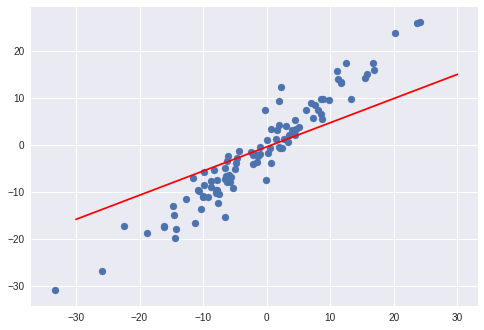

In [29]:
plot_fit('Initial Model')

In [0]:
# x = torch.tensor([[1.0], [2.0]])
# print(model.forward(x))

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # Stochastic Gradient Descent

In [32]:
# Train Model

epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  36.44832992553711
epoch:  1 loss:  43.94552230834961
epoch:  2 loss:  53.461822509765625
epoch:  3 loss:  65.54042053222656
epoch:  4 loss:  80.8705062866211
epoch:  5 loss:  100.32701110839844
epoch:  6 loss:  125.01986694335938
epoch:  7 loss:  156.3578643798828
epoch:  8 loss:  196.1288604736328
epoch:  9 loss:  246.60159301757812
epoch:  10 loss:  310.6554260253906
epoch:  11 loss:  391.94390869140625
epoch:  12 loss:  495.1044616699219
epoch:  13 loss:  626.0213623046875
epoch:  14 loss:  792.162353515625
epoch:  15 loss:  1003.0046997070312
epoch:  16 loss:  1270.57373046875
epoch:  17 loss:  1610.1314697265625
epoch:  18 loss:  2041.04736328125
epoch:  19 loss:  2587.89990234375
epoch:  20 loss:  3281.885986328125
epoch:  21 loss:  4162.58251953125
epoch:  22 loss:  5280.2265625
epoch:  23 loss:  6698.57080078125
epoch:  24 loss:  8498.50390625
epoch:  25 loss:  10782.7265625
epoch:  26 loss:  13681.5029296875
epoch:  27 loss:  17360.185546875
epoch:  28 loss:  

Text(0.5, 0, 'epoch')

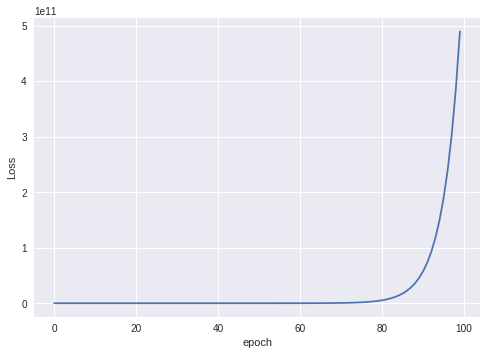

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

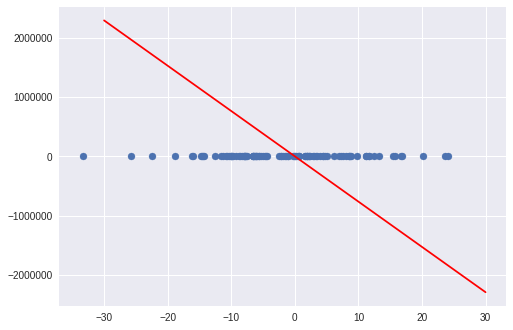

In [34]:
plot_fit("Trained Model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [36]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

NameError: ignored